In [1]:
import os, natsort, re
from tqdm import tqdm
import time, random

In [2]:
from itertools import repeat, chain

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#cd /content/drive/MyDrive/AI3_prjct2_aladin/

In [ ]:
cd /content/drive/MyDrive/WASSUP-ESTsoft-AI/project/project2/

[Errno 2] No such file or directory: '/content/drive/MyDrive/WASSUP-ESTsoft-AI/project/project2/'
/home/doeun/code/AI/ESTSOFT2024/workspace/2.project_text/aladin_usedbook/research


In [3]:
# 로컬에서

plt.rc("font", family = "D2Coding")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
PRJCT_PATH = '/home/doeun/code/AI/ESTSOFT2024/workspace/2.project_text/aladin_usedbook/'
#PRJCT_PATH = '/content/drive/MyDrive/WASSUP-ESTsoft-AI/project/project2/'
#PRJCT_PATH = '/content/drive/MyDrive/AI3_prjct2_aladin/aladin_usedbook/'
save_dir = 'processed/model_input'
dir_path = os.path.join(PRJCT_PATH,save_dir)
#dir_path = './'

In [5]:
ls

240710_crawling_step0.ipynb           240718_step0_by_js.ipynb
240711_crawling_step1.ipynb           240719_additional_eda.ipynb
240711_preprocess_bookinfo.ipynb      240719_simple_model_for_cropped.ipynb
240715_encoding_usedinfo.ipynb        240721_GridSearch_for_XGB.ipynb
240716_check_bookinfo.ipynb           240721_experiment_w_XGB.ipynb
240716_check_bookinfo2.ipynb          240721_hyperparameters_XGB.ipynb
240716_encoding_bookinfo.ipynb        241023_basic_model.ipynb
240717_simple_model_for_sample.ipynb  241023_preprocess_for_pred_rglr.ipynb
240717_split_and_scale.ipynb


In [6]:
import sys
sys.path.append(PRJCT_PATH)

In [7]:
RSLT_DIR = PRJCT_PATH + 'processed/'

bookinfo_name = 'bookinfo_ver{}.pkl'.format(0.75)
bookinfo_path = os.path.join(RSLT_DIR,bookinfo_name)

sys.path.append(PRJCT_PATH)
from module_aladin.file_io import load_pkl, save_pkl
from module_aladin.data_process import pd_datetime_2_datenum
from module_aladin.reg_tool import make_reg_score_dict 

from sklearn.preprocessing import MinMaxScaler

In [8]:
input_dir = os.path.join(RSLT_DIR,'model_input')
files = list(filter(lambda x : 'prd_rglr' in x,os.listdir(input_dir)))
files

['prd_rglr.v1.0_st-0_X_tst.pkl',
 'prd_rglr.v1.0_st-0_X_vld.pkl',
 'prd_rglr.v1.0_st-0_X_trn.pkl',
 'prd_rglr.v1.0_st-0_y_tst.pkl',
 'prd_rglr.v1.0_st-0_y_vld.pkl',
 'prd_rglr.v1.0_st-0_y_trn.pkl']

In [9]:
from collections import defaultdict

data_dict=defaultdict(dict)
for f in files:
    data_dict[f[-7:-4]][f[-9]] = load_pkl(os.path.join(input_dir,f))

In [10]:
data_dict.keys()

dict_keys(['tst', 'vld', 'trn'])

In [11]:
np.sum(np.isnan(data_dict['trn']['X']))

0

## MACHINE LEARNING

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [16]:
X_trn = data_dict['trn']['X'][:,:-1]
X_vld = data_dict['vld']['X'][:,:-1]
y_trn = data_dict['trn']['y']#/1000
y_vld = data_dict['vld']['y']#/1000

### DT

In [34]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_trn,y_trn)

DecisionTreeRegressor()

In [35]:
pred_trn = model_dt.predict(X_trn) 
pred_vld = model_dt.predict(X_vld) 
print(make_reg_score_dict(y_trn,pred_trn,np.mean(y_trn)))
print(make_reg_score_dict(y_vld,pred_vld,np.mean(y_trn)))

{'rmse': [3.0671891893130546e-16, 11.000063279093593], 'mape': [3.559424987719319e-18, 0.441706562412152], 'mase': [3.940688575868935e-18, 1], 'r2_score': [1.0, 0]}
{'rmse': [12.3998904503944, 10.336117762249843], 'mape': [0.36804301307413395, 0.4363872086950943], 'mase': [0.81215755292918, 1], 'r2_score': [-0.4392269962429254, 0]}


### SVR 

In [58]:
model_sv = SVR()
model_sv.fit(X_trn,y_trn)

SVR()

In [59]:
pred_trn = model_sv.predict(X_trn) 
pred_vld = model_sv.predict(X_vld) 
print(make_reg_score_dict(y_trn,pred_trn,np.mean(y_trn)))
print(make_reg_score_dict(y_vld,pred_vld,np.mean(y_trn)))

{'rmse': [10.55310508009246, 11.000063279093593], 'mape': [0.43307706064876256, 0.441706562412152], 'mase': [0.8324186804109708, 1], 'r2_score': [0.07961367337923364, 0]}
{'rmse': [9.857263929860553, 10.336117762249843], 'mape': [0.43425223984845973, 0.4363872086950943], 'mase': [0.8344168085413445, 1], 'r2_score': [0.09049232117420614, 0]}


### RFR 

In [36]:
model_rf = RandomForestRegressor()
model_rf.fit(X_trn,y_trn)

RandomForestRegressor()

In [37]:
pred_trn = model_rf.predict(X_trn) 
pred_vld = model_rf.predict(X_vld) 
print(make_reg_score_dict(y_trn,pred_trn,np.mean(y_trn)))
print(make_reg_score_dict(y_vld,pred_vld,np.mean(y_trn)))

{'rmse': [3.227147405526792, 11.000063279093593], 'mape': [0.10770144814576875, 0.441706562412152], 'mase': [0.21781143085171642, 1], 'r2_score': [0.9139309044924135, 0]}
{'rmse': [8.223555197494406, 10.336117762249843], 'mape': [0.3019676517384325, 0.4363872086950943], 'mase': [0.6090829502155927, 1], 'r2_score': [0.3669867163808739, 0]}


### XGB 

In [17]:
import xgboost as xgb
from xgboost import DMatrix

data_trn = DMatrix(X_trn,y_trn)
data_vld = DMatrix(X_vld,y_vld)

param = {
    'min_child_weight' : 4,
    'gamma' : 0,
    'subsample' : 1,
     'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 6,
 'num_boost_round': 2500 
}

model_xgb = xgb.train(param,data_trn)

/home/doeun/anaconda3/envs/EST_PRJ/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [22:58:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1713397725960/work/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
pred_trn = model_xgb.predict(data_trn) 
pred_vld = model_xgb.predict(data_vld)
print(make_reg_score_dict(y_trn,pred_trn,np.mean(y_trn)))
print(make_reg_score_dict(y_vld,pred_vld,np.mean(y_trn)))

{'rmse': [8083.080583652504, 11000.063279093594], 'mape': [0.35190701588489515, 0.441706562412152], 'mase': [0.6582933082104451, 1], 'r2_score': [0.4600376858141322, 0]}
{'rmse': [8429.747797487778, 10336.117762249845], 'mape': [0.36065042808343856, 0.43638720869509434], 'mase': [0.6848223782414837, 1], 'r2_score': [0.33484514844492097, 0]}


<Axes: >

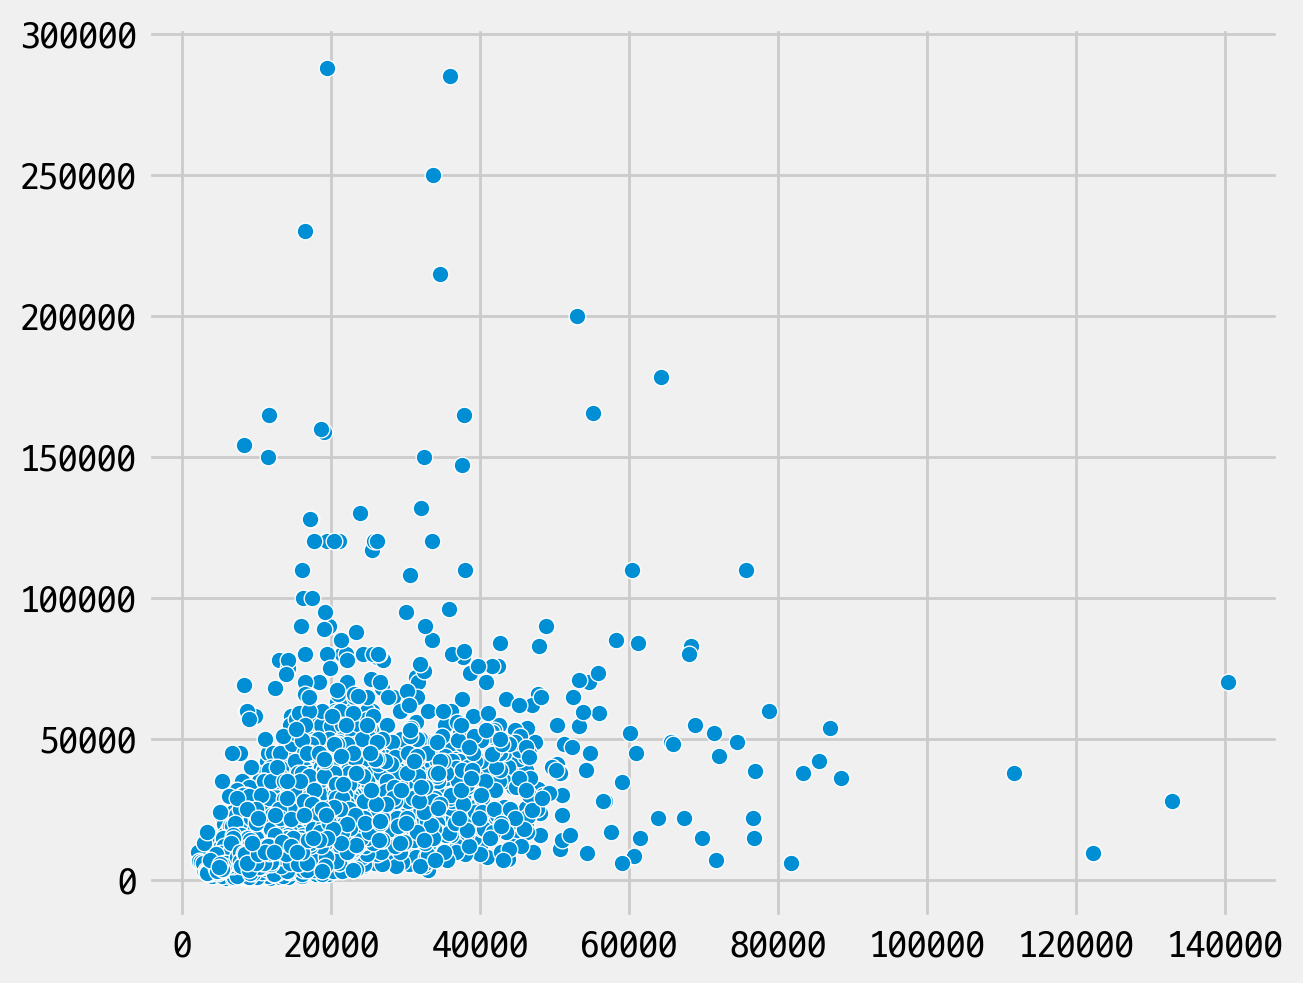

In [20]:
plt.subplot()
sns.scatterplot(x=pred_vld,y=y_vld)